Analyzing a dataset with a large number of records and data distributed almost uniformly throughout presents a challenge for me. I welcome any feedback that helps me improve my analysis. I hope this notebook proves useful to those wishing to try out different techniques with this dataset, as well as for conducting a more in-depth analysis.

# Data Loading and Cleaning

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brewery-operations-and-market-analysis-dataset/brewery_data_complete_extended.csv


## Data Loading

In [2]:
data = pd.read_csv("/kaggle/input/brewery-operations-and-market-analysis-dataset/brewery_data_complete_extended.csv")
data.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


## Data Dictionary
`Batch_ID:` A unique identifier assigned to each batch of beer produced.  
`Brew_Date:` The date on which the beer batch was brewed.  
`Beer_Style:` The style or type of beer, such as IPA, Stout, Lager, Ale, etc.  
`SKU:` The packaging type in which the beer is sold, like Kegs, Bottles, Cans, or Pints.  
`Location:` The packaging type in which the beer is sold, like Kegs, Bottles, Cans, or Pints.  
`Fermentation_Time:` The duration of the fermentation process, measured in days.  
`Temperature:` The average temperature (in Celsius) maintained during the brewing process.  
`pH_Level:` The pH level of the beer, indicating its acidity or alkalinity.  
`Gravity:` A measure of the density of the beer as compared to water, indicating the potential alcohol content.  
`Alcohol_Content:` The percentage of alcohol by volume in the beer.  
`Bitterness:` The bitterness of the beer, measured in International Bitterness Units (IBU).  
`Color:` The color of the beer measured using the Standard Reference Method (SRM).  
`Ingredient_Ratio:` The ratio of different ingredients used in the beer, such as malt, hops, etc.  
`Volume_Produced:` The volume of beer produced in the batch, measured in liters.  
`Total_Sales:` The total sales generated from the batch, expressed in a currency unit.  
`Quality_Score:` An overall quality score assigned to the beer batch, rated out of 10.  
`Brewhouse_Efficiency:` The efficiency of the brewing process, expressed as a percentage.  
`Loss_During_Brewing:` The percentage of volume loss during the brewing process.  
`Loss_During_Fermentation:` The percentage of volume loss during the fermentation process.  
`Loss_During_Bottling_Kegging:` The percentage of volume loss during the bottling or kegging process.  

## Check Data Types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Batch_ID                      int64  
 1   Brew_Date                     object 
 2   Beer_Style                    object 
 3   SKU                           object 
 4   Location                      object 
 5   Fermentation_Time             int64  
 6   Temperature                   float64
 7   pH_Level                      float64
 8   Gravity                       float64
 9   Alcohol_Content               float64
 10  Bitterness                    int64  
 11  Color                         int64  
 12  Ingredient_Ratio              object 
 13  Volume_Produced               int64  
 14  Total_Sales                   float64
 15  Quality_Score                 float64
 16  Brewhouse_Efficiency          float64
 17  Loss_During_Brewing           float64
 18  Loss_During_Fermentat

In [4]:
# Convert datatype of Brew_date, from object to datetime
data["Brew_Date"] = data["Brew_Date"].astype("datetime64[ns]")

## Split columns

In [5]:
# Split Ingredient_Ratio (object datatype) in 3 numeric columns
data[["Ratio1","Ratio2","Ratio3"]] = data["Ingredient_Ratio"].str.split(":", expand = True).astype(float)

## Check Batch_ID Uniqueness

In [6]:
data["Batch_ID"].is_unique

True

## Check duplicates

In [7]:
data.duplicated().any()

False

## Check missing values

In [8]:
data.isnull().sum()

Batch_ID                        0
Brew_Date                       0
Beer_Style                      0
SKU                             0
Location                        0
Fermentation_Time               0
Temperature                     0
pH_Level                        0
Gravity                         0
Alcohol_Content                 0
Bitterness                      0
Color                           0
Ingredient_Ratio                0
Volume_Produced                 0
Total_Sales                     0
Quality_Score                   0
Brewhouse_Efficiency            0
Loss_During_Brewing             0
Loss_During_Fermentation        0
Loss_During_Bottling_Kegging    0
Ratio1                          0
Ratio2                          0
Ratio3                          0
dtype: int64

## Summary Statistics

In [9]:
# numeric features
data.describe()

,Batch_ID,Brew_Date,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Ratio1,Ratio2,Ratio3
count,1.000000e+07,10000000,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07
mean,5.000000e+06,2021-12-31 12:24:42.046322432,1.450090e+01,1.999990e+01,4.999941e+00,1.055003e+00,5.249709e+00,3.949620e+01,1.199935e+01,2.749031e+03,1.049779e+04,7.999825e+00,8.000092e+01,3.000081e+00,3.000002e+00,3.000159e+00,1.0,3.499613e-01,2.000041e-01
min,0.000000e+00,2020-01-01 00:00:19,1.000000e+01,1.500000e+01,4.500000e+00,1.030000e+00,4.500000e+00,2.000000e+01,5.000000e+00,5.000000e+02,1.000001e+03,6.000001e+00,7.000001e+01,1.000000e+00,1.000001e+00,1.000000e+00,1.0,2.000000e-01,1.000000e-01
25%,2.500000e+06,2020-12-31 05:55:00.500000,1.200000e+01,1.749984e+01,4.750040e+00,1.042502e+00,4.874663e+00,2.900000e+01,8.000000e+00,1.623000e+03,5.747244e+03,6.999507e+00,7.499786e+01,2.000431e+00,1.999306e+00,2.000486e+00,1.0,2.700000e-01,1.500000e-01
50%,5.000000e+06,2021-12-31 13:24:39,1.500000e+01,1.999977e+01,4.999885e+00,1.055004e+00,5.249849e+00,3.900000e+01,1.200000e+01,2.749000e+03,1.049629e+04,7.999932e+00,8.000250e+01,2.999722e+00,2.999761e+00,3.000721e+00,1.0,3.500000e-01,2.000000e-01
75%,7.499999e+06,2022-12-31 20:06:47,1.700000e+01,2.250076e+01,5.249937e+00,1.067505e+00,5.624602e+00,4.900000e+01,1.600000e+01,3.874000e+03,1.524921e+04,8.999796e+00,8.500283e+01,4.000636e+00,4.000587e+00,4.000120e+00,1.0,4.200000e-01,2.500000e-01
max,9.999999e+06,2023-12-31 23:59:54,1.900000e+01,2.500000e+01,5.500000e+00,1.080000e+00,6.000000e+00,5.900000e+01,1.900000e+01,4.999000e+03,2.000000e+04,9.999999e+00,9.000000e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.0,5.000000e-01,3.000000e-01
std,2.886751e+06,NaN,2.872006e+00,2.887030e+00,2.886376e-01,1.443465e-02,4.329614e-01,1.154557e+01,4.321170e+00,1.299078e+03,5.485996e+03,1.154679e+00,5.774930e+00,1.154748e+00,1.154827e+00,1.154719e+00,0.0,8.672460e-02,5.788243e-02


In [10]:
# object (string) features
data.describe(include = ["O"])

,Beer_Style,SKU,Location,Ingredient_Ratio
count,10000000,10000000,10000000,10000000
unique,8,4,10,651
top,Ale,Bottles,HSR Layout,1:0.21:0.27
freq,1251002,2501597,1000789,17040


# Exploratory Data Analysis

## Batches and Volume per month

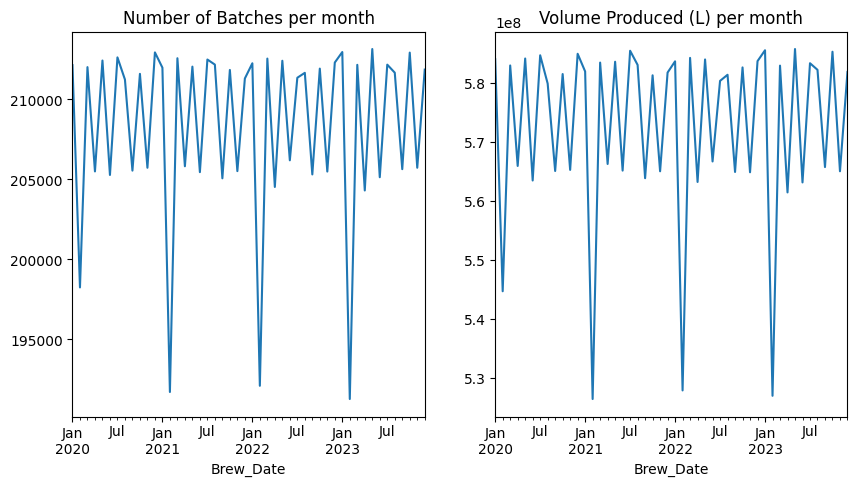

In [11]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
data.groupby(data["Brew_Date"].dt.to_period("M"))["Batch_ID"].count().plot(ax = axs[0])
axs[0].set_title("Number of Batches per month")
data.groupby(data["Brew_Date"].dt.to_period("M"))["Volume_Produced"].sum().plot(ax = axs[1])
axs[1].set_title("Volume Produced (L) per month");

In [12]:
# Fermentation_Time Temperature pH_Level Gravity
# Alcohol_Content Bitterness Color Volume_Produced
# Loss_During_Brewing Loss_During_Fermentation Loss_During_Bottling_Kegging
# Total_Sales Quality_Score Brewhouse_Efficiency
# Ratio1 Ratio2 Ratio3

## Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

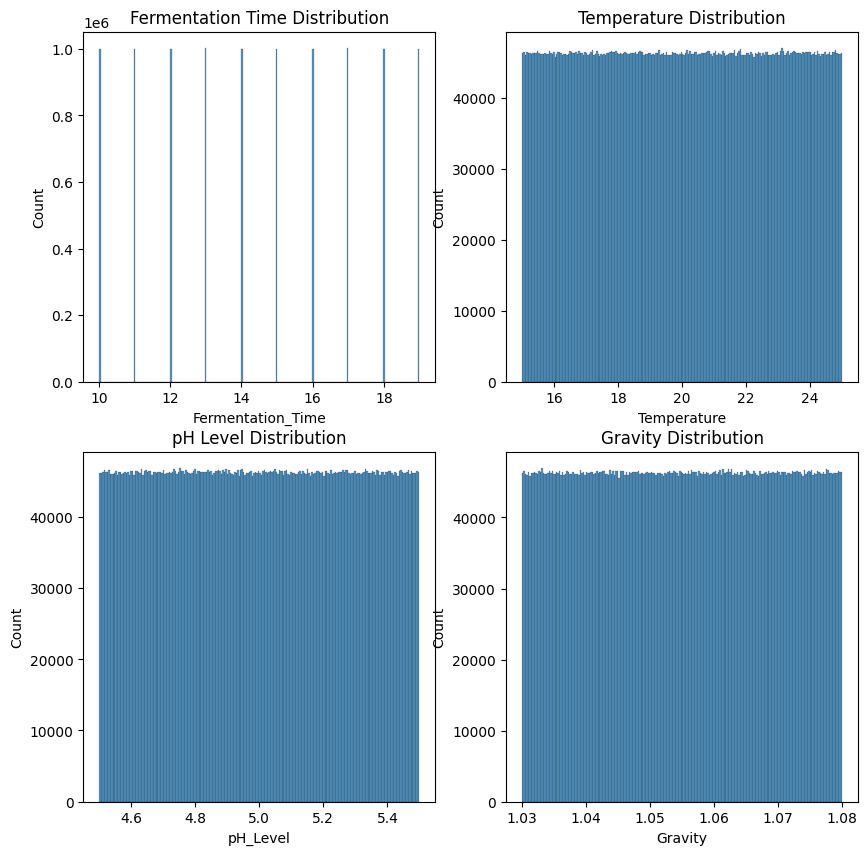

In [13]:
# Fermentation_Time Temperature pH_Level Gravity
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.histplot(data = data, x = "Fermentation_Time", ax = axs[0,0])
axs[0,0].set_title("Fermentation Time Distribution")
sns.histplot(data = data, x = "Temperature", ax = axs[0,1])
axs[0,1].set_title("Temperature Distribution")
sns.histplot(data = data, x = "pH_Level", ax = axs[1,0])
axs[1,0].set_title("pH Level Distribution")
sns.histplot(data = data, x = "Gravity", ax = axs[1,1])
axs[1,1].set_title("Gravity Distribution");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

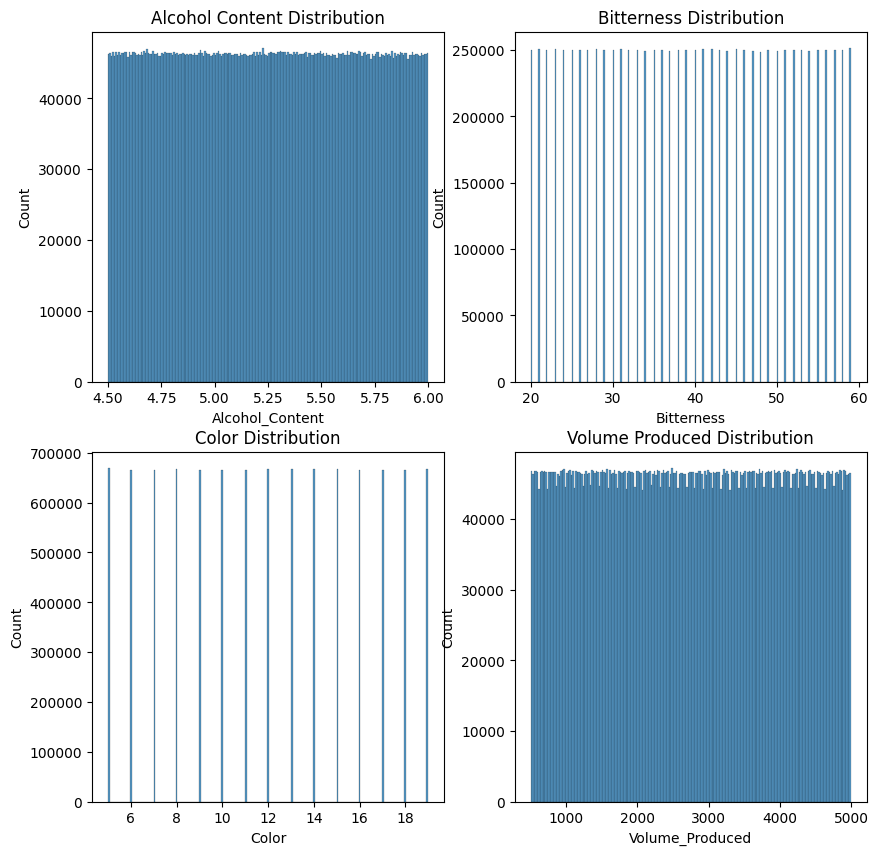

In [14]:
# Alcohol_Content Bitterness Color Volume_Produced
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.histplot(data = data, x = "Alcohol_Content", ax = axs[0,0])
axs[0,0].set_title("Alcohol Content Distribution")
sns.histplot(data = data, x = "Bitterness", ax = axs[0,1])
axs[0,1].set_title("Bitterness Distribution")
sns.histplot(data = data, x = "Color", ax = axs[1,0])
axs[1,0].set_title("Color Distribution")
sns.histplot(data = data, x = "Volume_Produced", ax = axs[1,1])
axs[1,1].set_title("Volume Produced Distribution");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


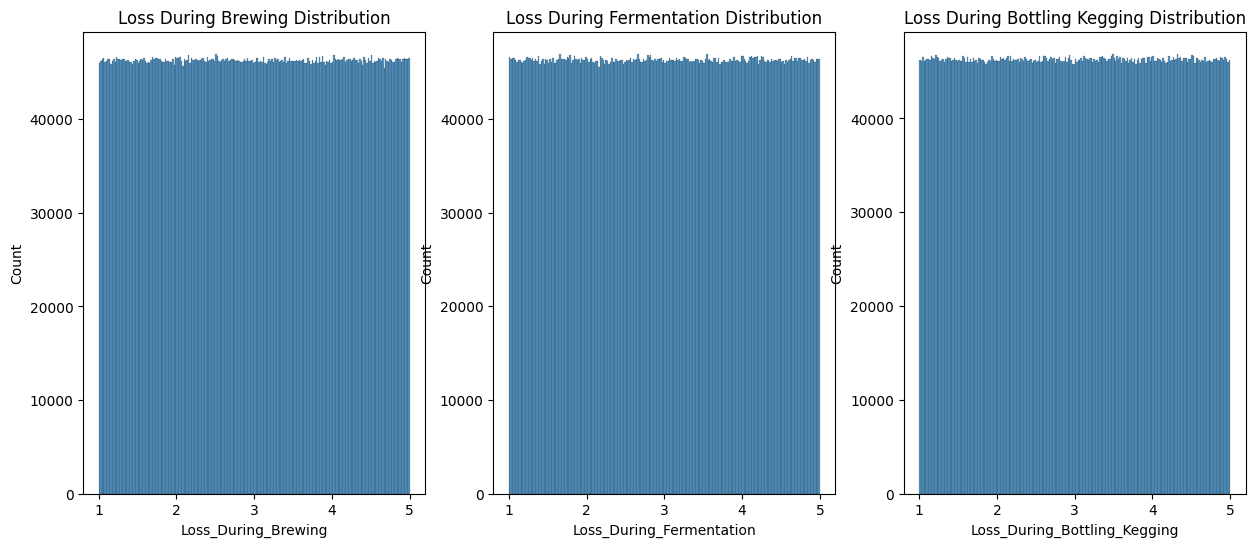

In [15]:
# Loss_During_Brewing Loss_During_Fermentation Loss_During_Bottling_Kegging
fig, axs = plt.subplots(1,3, figsize = (15,6))
sns.histplot(data = data, x = "Loss_During_Brewing", ax = axs[0])
axs[0].set_title("Loss During Brewing Distribution")
sns.histplot(data = data, x = "Loss_During_Fermentation", ax = axs[1])
axs[1].set_title("Loss During Fermentation Distribution")
sns.histplot(data = data, x = "Loss_During_Bottling_Kegging", ax = axs[2])
axs[2].set_title("Loss During Bottling Kegging Distribution");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


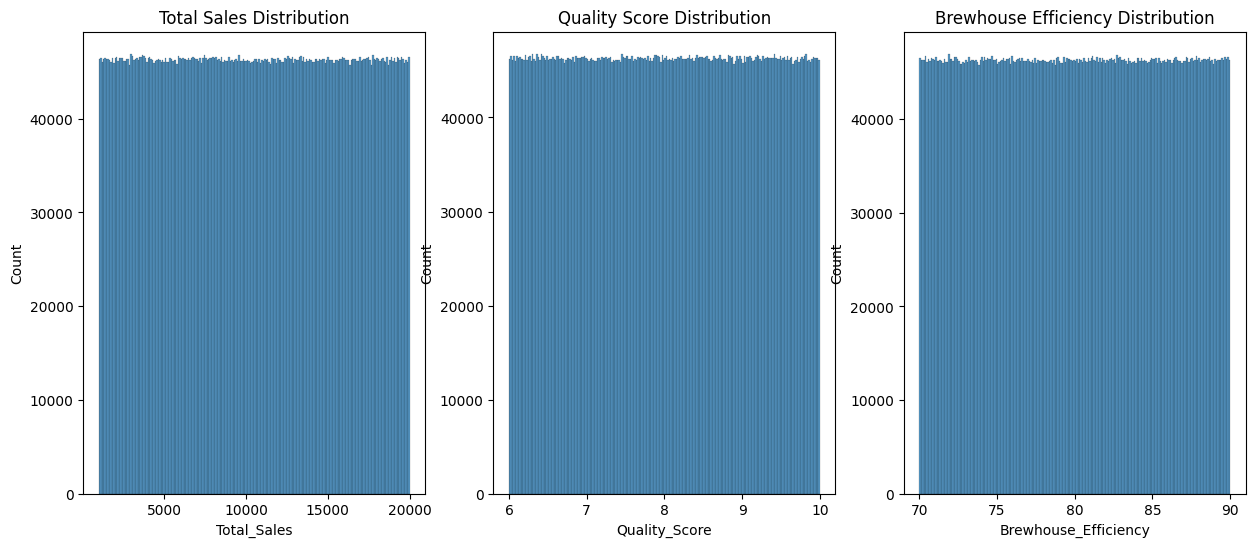

In [16]:
# Total_Sales Quality_Score Brewhouse_Efficiency
fig, axs = plt.subplots(1,3, figsize = (15,6))
sns.histplot(data = data, x = "Total_Sales", ax = axs[0])
axs[0].set_title("Total Sales Distribution")
sns.histplot(data = data, x = "Quality_Score", ax = axs[1])
axs[1].set_title("Quality Score Distribution")
sns.histplot(data = data, x = "Brewhouse_Efficiency", ax = axs[2])
axs[2].set_title("Brewhouse Efficiency Distribution");

## Relations between variables

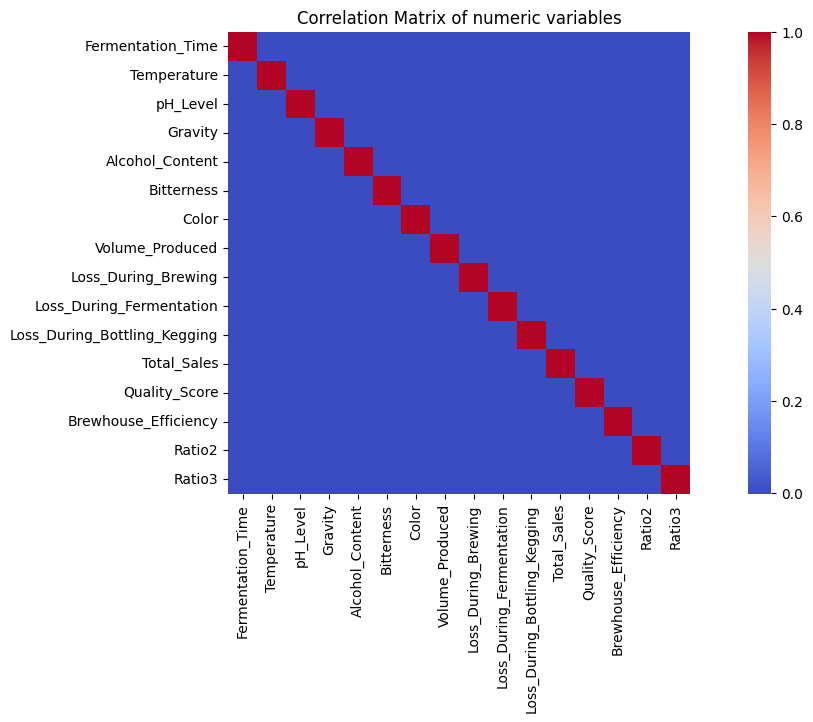

In [17]:
# Fermentation_Time Temperature pH_Level Gravity
# Alcohol_Content Bitterness Color Volume_Produced
# Loss_During_Brewing Loss_During_Fermentation Loss_During_Bottling_Kegging
# Total_Sales Quality_Score Brewhouse_Efficiency
# Ratio1 Ratio2 Ratio3

data_numeric = data[["Fermentation_Time", "Temperature", "pH_Level", "Gravity",
                     "Alcohol_Content", "Bitterness", "Color", "Volume_Produced",
                     "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging",
                     "Total_Sales", "Quality_Score", "Brewhouse_Efficiency",
                     "Ratio2", "Ratio3"]]

plt.figure(figsize = (15,6))
sns.heatmap(data_numeric.corr(), annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of numeric variables");

In [18]:
data_numeric = data[["Fermentation_Time", "Temperature", "pH_Level", "Gravity",
                     "Alcohol_Content", "Bitterness", "Color", "Volume_Produced",
                     "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging",
                     "Total_Sales", "Quality_Score", "Brewhouse_Efficiency",
                     "Ratio2", "Ratio3"]]
data_numeric.corr()

,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Total_Sales,Quality_Score,Brewhouse_Efficiency,Ratio2,Ratio3
Fermentation_Time,1.000000,0.000198,0.000095,0.000347,0.000124,-0.000080,-0.000016,-0.000138,0.000091,0.000122,0.000206,0.000170,-0.000041,0.000179,0.000151,0.000177
Temperature,0.000198,1.000000,-0.000465,0.000198,-0.000134,0.000130,0.000309,0.000139,0.000307,-0.000250,-0.000335,0.000048,0.000266,-0.000691,-0.000034,0.000002
pH_Level,0.000095,-0.000465,1.000000,0.000285,0.000220,0.000107,0.000215,-0.000263,0.000096,-0.000203,-0.000686,-0.000049,0.000289,-0.000447,0.000928,0.000038
Gravity,0.000347,0.000198,0.000285,1.000000,-0.000035,0.000353,0.000057,0.000432,0.000143,0.000436,-0.000382,0.000514,0.000288,0.000124,-0.000491,0.000573
Alcohol_Content,0.000124,-0.000134,0.000220,-0.000035,1.000000,0.000137,-0.000229,0.000333,-0.000678,0.000152,0.000471,0.000523,0.000069,0.000161,0.000093,0.000143
Bitterness,-0.000080,0.000130,0.000107,0.000353,0.000137,1.000000,-0.000383,-0.000230,-0.000015,-0.000387,0.000054,-0.000154,-0.000837,-0.000087,-0.000136,-0.000026
Color,-0.000016,0.000309,0.000215,0.000057,-0.000229,-0.000383,1.000000,-0.000096,0.000272,-0.000259,0.000177,0.000147,-0.000149,0.000044,0.000158,0.000178
Volume_Produced,-0.000138,0.000139,-0.000263,0.000432,0.000333,-0.000230,-0.000096,1.000000,-0.000289,-0.000039,0.000169,0.000045,-0.000074,0.000380,-0.000420,0.000262
Loss_During_Brewing,0.000091,0.000307,0.000096,0.000143,-0.000678,-0.000015,0.000272,-0.000289,1.000000,0.000015,-0.000073,0.000164,0.000611,-0.000431,-0.000190,-0.000298
Loss_During_Fermentation,0.000122,-0.000250,-0.000203,0.000436,0.000152,-0.000387,-0.000259,-0.000039,0.000015,1.000000,-0.000132,-0.000310,-0.000290,0.000230,-0.000369,0.000717


## Investigate Categories

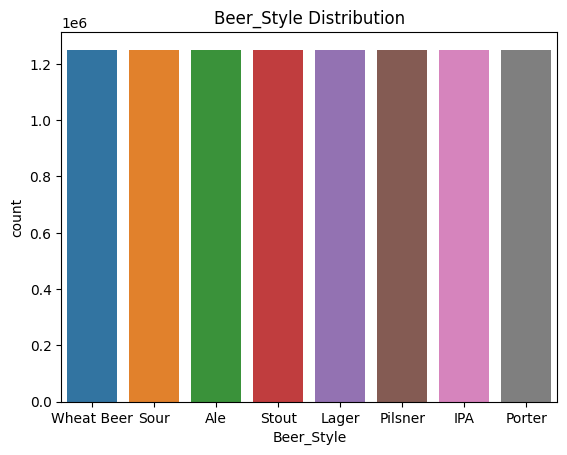

In [19]:
# Beer_Style SKU Location Ingredient_Ratio
data_cat = data[["Beer_Style", "SKU", "Location", "Ingredient_Ratio"]]
sns.countplot(data = data_cat, x = "Beer_Style")
plt.title("Beer_Style Distribution");

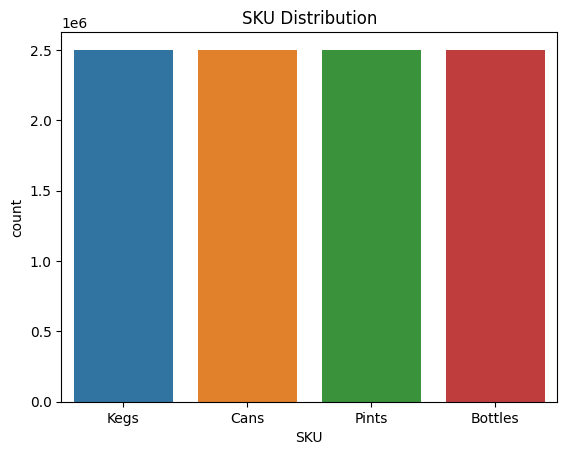

In [20]:
sns.countplot(data = data_cat, x = "SKU")
plt.title("SKU Distribution");

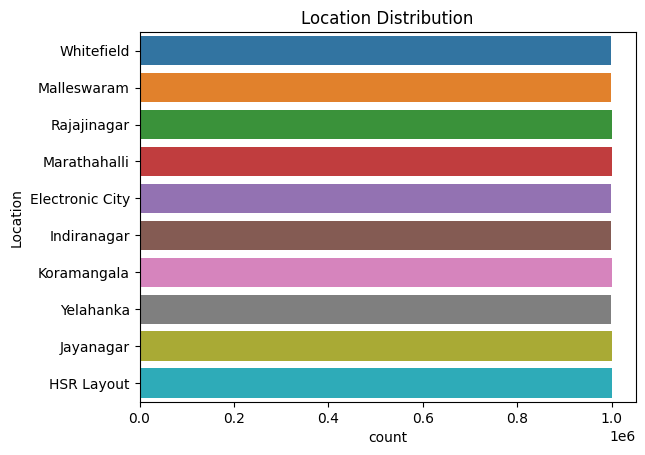

In [21]:
sns.countplot(data = data_cat, y = "Location")
plt.title("Location Distribution");

## Check Ingredient Ratios

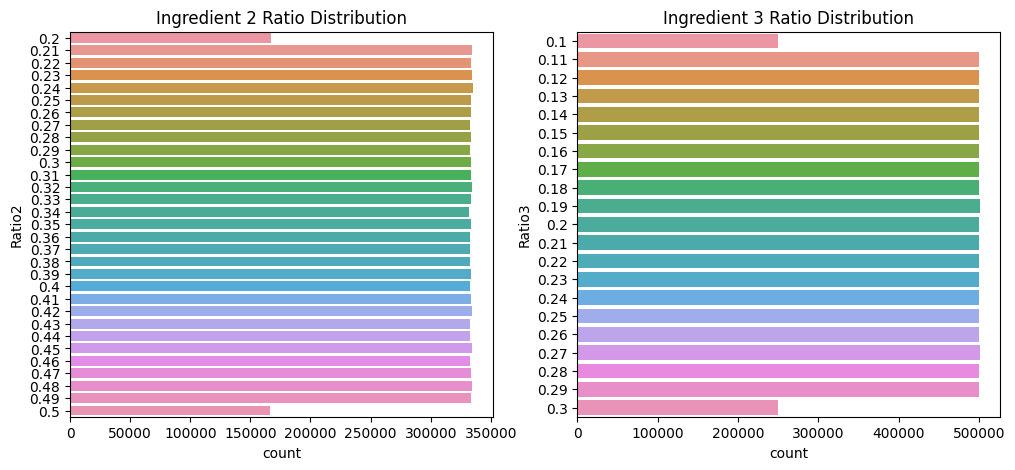

In [22]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
sns.countplot(data = data, y = "Ratio2", ax = axs[0])
axs[0].set_title("Ingredient 2 Ratio Distribution")
sns.countplot(data = data, y = "Ratio3", ax = axs[1])
axs[1].set_title("Ingredient 3 Ratio Distribution");

In [23]:
data["Ingredient_Ratio"].value_counts()

Ingredient_Ratio
1:0.21:0.27    17040
1:0.26:0.29    17028
1:0.24:0.19    17016
1:0.32:0.20    17015
1:0.22:0.26    16983
               ...  
1:0.50:0.18     8065
1:0.50:0.10     4249
1:0.20:0.10     4154
1:0.50:0.30     4149
1:0.20:0.30     4144
Name: count, Length: 651, dtype: int64

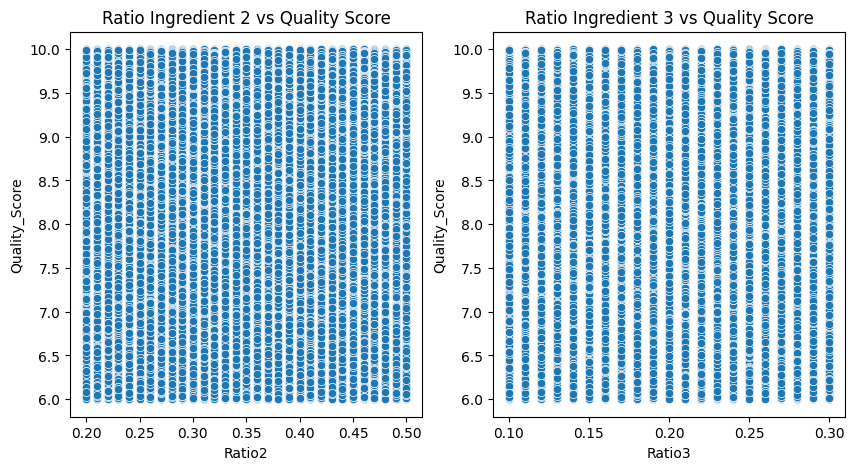

In [24]:
# Total_Sales Quality_Score Brewhouse_Efficiency
fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.scatterplot(data = data, x = "Ratio2", y = "Quality_Score", ax = axs[0])
axs[0].set_title("Ratio Ingredient 2 vs Quality Score")
sns.scatterplot(data = data, x = "Ratio3", y = "Quality_Score", ax = axs[1])
axs[1].set_title("Ratio Ingredient 3 vs Quality Score");

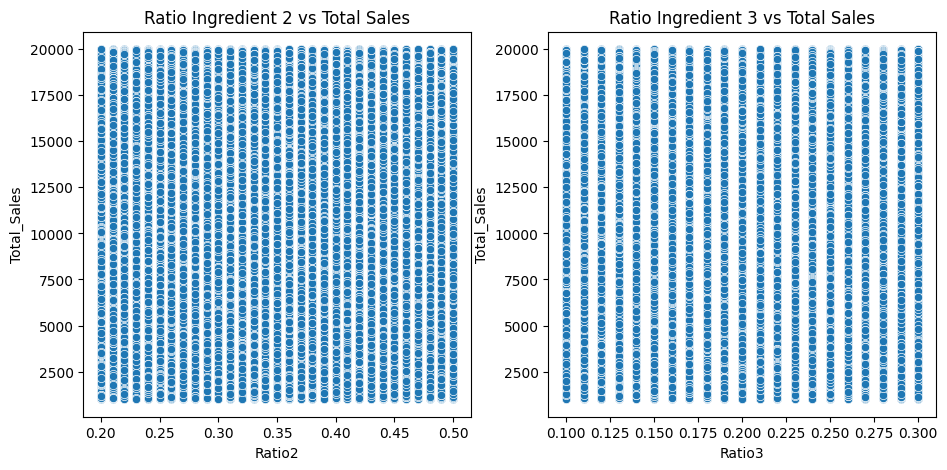

In [25]:
fig, axs = plt.subplots(1,2,figsize = (11,5))
sns.scatterplot(data = data, x = "Ratio2", y = "Total_Sales", ax = axs[0])
axs[0].set_title("Ratio Ingredient 2 vs Total Sales")
sns.scatterplot(data = data, x = "Ratio3", y = "Total_Sales", ax = axs[1])
axs[1].set_title("Ratio Ingredient 3 vs Total Sales");

## Temporal Analysis

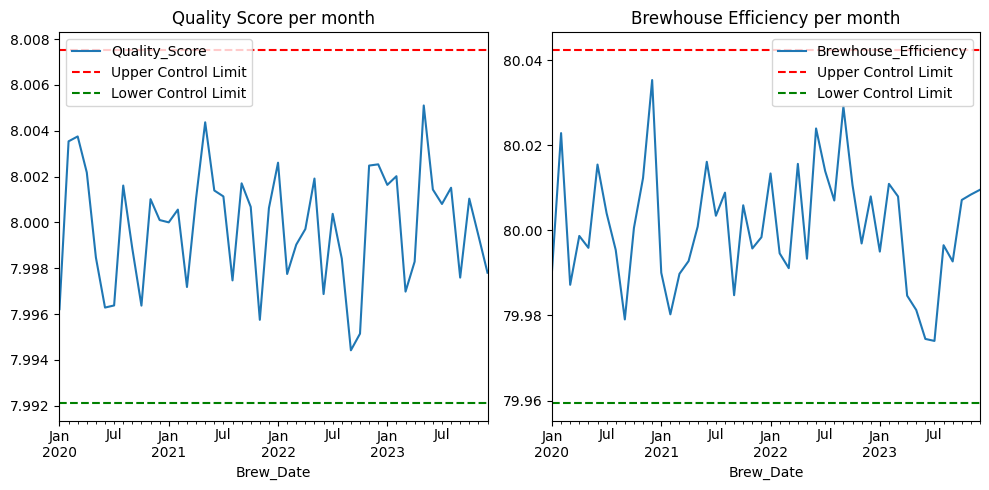

In [26]:
mean_quality_score = data.groupby(data["Brew_Date"].dt.to_period("M"))["Quality_Score"].mean()
mean_brewhouse_efficiency = data.groupby(data["Brew_Date"].dt.to_period("M"))["Brewhouse_Efficiency"].mean()

# Control Limits for Quality Score
quality_score_mean = mean_quality_score.mean()
quality_score_std = mean_quality_score.std()
quality_score_control_limit_upper = quality_score_mean + 3 * quality_score_std
quality_score_control_limit_lower = quality_score_mean - 3 * quality_score_std

# Control Limits for Brewhouse Efficiency
brewhouse_efficiency_mean = mean_brewhouse_efficiency.mean()
brewhouse_efficiency_std = mean_brewhouse_efficiency.std()
brewhouse_efficiency_control_limit_upper = brewhouse_efficiency_mean + 3 * brewhouse_efficiency_std
brewhouse_efficiency_control_limit_lower = brewhouse_efficiency_mean - 3 * brewhouse_efficiency_std

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Quality Score Plot
mean_quality_score.plot(ax=axs[0])
axs[0].axhline(y=quality_score_control_limit_upper, color='red', linestyle='--', label='Upper Control Limit')
axs[0].axhline(y=quality_score_control_limit_lower, color='green', linestyle='--', label='Lower Control Limit')
axs[0].set_title('Quality Score per month')
axs[0].legend()

# Brewhouse Efficiency Plot
mean_brewhouse_efficiency.plot(ax=axs[1])
axs[1].axhline(y=brewhouse_efficiency_control_limit_upper, color='red', linestyle='--', label='Upper Control Limit')
axs[1].axhline(y=brewhouse_efficiency_control_limit_lower, color='green', linestyle='--', label='Lower Control Limit')
axs[1].set_title('Brewhouse Efficiency per month')
axs[1].legend()

# Show plots
plt.tight_layout()
plt.show()

In [27]:
# Check Quality Score of September - August 2022
time_condition = (data["Brew_Date"] > "2022-09-01 00:00:00") & (data["Brew_Date"] < "2022-10-30 23:59:59")
data[time_condition].describe()

,Batch_ID,Brew_Date,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Ratio1,Ratio2,Ratio3
count,4.103550e+05,410355,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.000000,410355.0,410355.000000,410355.000000
mean,4.996873e+06,2022-09-30 23:55:18.959715584,14.496397,20.003043,4.999101,1.055059,5.249839,39.493049,12.002890,2750.984543,10486.284773,7.994622,80.018677,3.004806,2.999812,3.002301,1.0,0.349961,0.200072
min,1.000000e+00,2022-09-01 00:00:03,10.000000,15.000009,4.500001,1.030000,4.500003,20.000000,5.000000,500.000000,1000.123319,6.000001,70.000088,1.000012,1.000012,1.000012,1.0,0.200000,0.100000
25%,2.493374e+06,2022-09-15 22:26:40,12.000000,17.508841,4.748821,1.042550,4.875001,29.000000,8.000000,1624.000000,5733.373958,6.993812,75.024476,2.008720,1.998695,2.002902,1.0,0.280000,0.150000
50%,4.998055e+06,2022-09-30 23:32:32,14.000000,20.003239,4.999416,1.055050,5.249981,39.000000,12.000000,2752.000000,10467.729150,7.991119,80.025721,3.006149,3.000528,3.004312,1.0,0.350000,0.200000
75%,7.493848e+06,2022-10-16 00:59:42.500000,17.000000,22.496895,5.248552,1.067614,5.624374,50.000000,16.000000,3873.000000,15242.553133,8.993095,85.031566,4.005244,3.999881,4.002825,1.0,0.420000,0.250000
max,9.999955e+06,2022-10-30 23:59:42,19.000000,24.999880,5.499997,1.080000,5.999999,59.000000,19.000000,4999.000000,19999.977218,9.999971,89.999996,4.999999,4.999984,5.000000,1.0,0.500000,0.300000
std,2.886800e+06,NaN,2.872231,2.885161,0.288561,0.014458,0.432761,11.555320,4.323251,1299.338761,5484.485478,1.154633,5.774817,1.154285,1.154701,1.154740,0.0,0.086671,0.057880


In [28]:
diff = data[time_condition].describe() - data.describe()
diff = diff.drop(columns = ["Batch_ID","Brew_Date"])
diff = diff.loc[["mean","std"],:].T

In [29]:
diff.sort_values("mean")

,mean,std
Total_Sales,-1.150057e+01,-1.510067
Quality_Score,-5.202805e-03,-0.000047
Fermentation_Time,-4.500978e-03,0.000225
Bitterness,-3.150898e-03,0.009748
pH_Level,-8.399379e-04,-0.000076
Loss_During_Fermentation,-1.902731e-04,-0.000126
Ratio2,-5.125832e-07,-0.000054
Ratio1,0.000000e+00,0.000000
Gravity,5.661381e-05,0.000023
Ratio3,6.788008e-05,-0.000002


In that period of time `Total_Sales`, `Fermentation_Time` and `Bitterness` decreased. At the same time `Volume_Produced`, `Brewhouse_Efficiency`, `Loss_During_Brew`, `Color` and `Temperature` increased.  
**However, due to the very minimal amounts, we couldn't consider they as factors causing the decrease in the `Quality_Score`.**

# Preprocessing and modelling: Predictive Modeling for Quality Assessment

## Define the target

Our first target is going to be the `Quality_Score`, the higher the better.

In [30]:
y = data["Quality_Score"]

## Define the features

In [31]:
columns_to_exclude = ["Batch_ID", "Brew_Date", "Ratio1"]
all_columns = data.columns.tolist()
feature_columns = [col for col in all_columns if col not in columns_to_exclude]

In [32]:
X = data[feature_columns]

## Build the pipeline

In [33]:
# OneHotEncoder for categorical columns
from sklearn.preprocessing import OneHotEncoder
# Scaling
from sklearn.preprocessing import StandardScaler
# Pipeline
from sklearn.pipeline import Pipeline
# Cross Validation
from sklearn.model_selection import cross_val_score

In [34]:
def get_mae(model):   
    
    pipeline = Pipeline(
        [("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
        ("Scaler", StandardScaler(with_mean=False)),
        ("Regressor", model)]
    )
        
    mae_scores = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
    avg_mae = mae_scores.mean()
    
    print(f"Mean Absolute Error (MAE) of {model}: {avg_mae}")

## Define the models

In [35]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [36]:
models = [LinearRegression(), Ridge(), Lasso(), SVR()]

## Train and Test

In [37]:
# Sampling
sample_size = 10000
random_state_value = 42
X = X.sample(n=sample_size, random_state=random_state_value)
y = y.sample(n=sample_size, random_state=random_state_value)

In [38]:
for model in models:
    get_mae(model)

Mean Absolute Error (MAE) of LinearRegression(): 1.001692508991845
Mean Absolute Error (MAE) of Ridge(): 1.0016924484304162
Mean Absolute Error (MAE) of Lasso(): 0.9997193796002026
Mean Absolute Error (MAE) of SVR(): 1.0363209912513875


In [39]:
print(y.mean())
print(y.std())

8.006891386587272
1.1578385097867356


## Try different alphas for Lasso Regression

In [40]:
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]

for alpha in alphas:
    get_mae(Lasso(alpha = alpha))

Mean Absolute Error (MAE) of Lasso(alpha=0.1): 0.9997193796002026
Mean Absolute Error (MAE) of Lasso(alpha=0.5): 0.9997193796002026
Mean Absolute Error (MAE) of Lasso(): 0.9997193796002026
Mean Absolute Error (MAE) of Lasso(alpha=5.0): 0.9997193796002026
Mean Absolute Error (MAE) of Lasso(alpha=10.0): 0.9997193796002026


## Feature Importance

In [41]:
def get_feature_importance(model):
    pipeline = Pipeline([
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
        ("Scaler", StandardScaler(with_mean=False)),
        ("Regressor", model)
    ])
    pipeline.fit(X, y)
    
    lasso_model = pipeline.named_steps['Regressor']
    
    coefficients = lasso_model.coef_
    
    encoded_feature_names = pipeline.named_steps['OneHotEncoder'].get_feature_names_out()
    
    feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Coefficient': coefficients})
    
    return feature_importance_df.sort_values("Coefficient")

lasso_feature_importance = get_feature_importance(Lasso(alpha=1.0))

print(lasso_feature_importance)

                                       Feature  Coefficient
0                               Beer_Style_Ale         -0.0
69887   Brewhouse_Efficiency_80.27262596237634          0.0
69886    Brewhouse_Efficiency_80.2724194768361         -0.0
69885   Brewhouse_Efficiency_80.27234788095171         -0.0
69884   Brewhouse_Efficiency_80.27142780295934          0.0
...                                        ...          ...
34935        Alcohol_Content_5.235300876966878          0.0
34934        Alcohol_Content_5.235035646026438          0.0
34933        Alcohol_Content_5.234951207915492          0.0
34943        Alcohol_Content_5.236321010227561         -0.0
104822                              Ratio3_0.3         -0.0

[104823 rows x 2 columns]


## Try the mean as a predictor

In [42]:
from sklearn.dummy import DummyRegressor

get_mae(DummyRegressor(strategy = "mean"))

Mean Absolute Error (MAE) of DummyRegressor(): 0.9997193796002026


*The mean predicts as good as Lasso, maybe I should have tried this first.*  
As the EDA suggested, the features might not be providing much predictive power.

# Preprocessing and modelling: Market Segmentation

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def get_clusters12(model, X):
    pipeline = Pipeline([
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
        ("Scaler", StandardScaler(with_mean=False)),
        ("Clusterer", model)
    ])
    
    # Fit the pipeline to the data and obtain cluster assignments
    pipeline.fit(X)
    clusters = pipeline.named_steps['Clusterer'].labels_
    
    # Visualize the clusters
    plt.figure(figsize = (15,5))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering')
    plt.show()

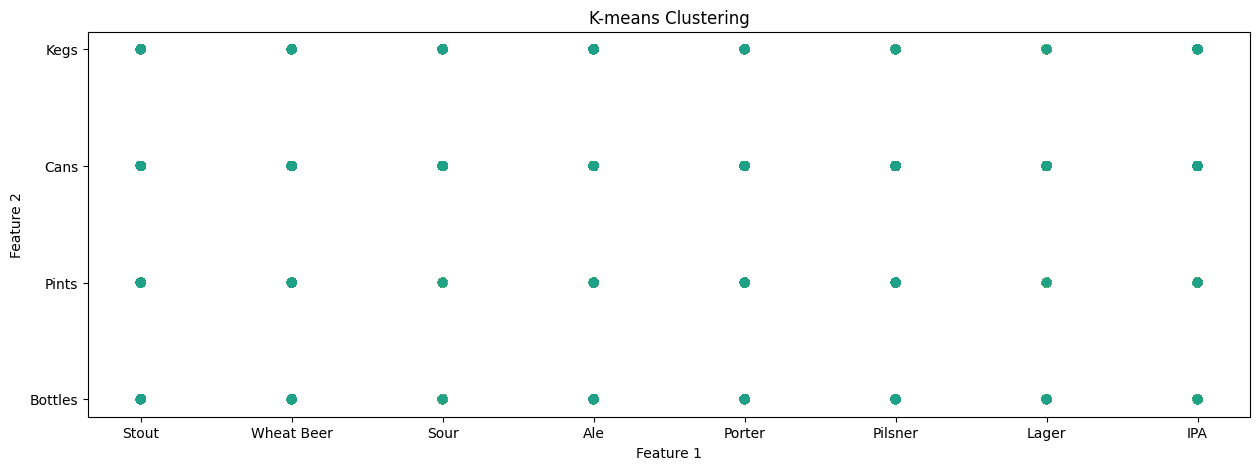

In [44]:
kmeans_model = KMeans(n_init = 10)
X_np = X.values
get_clusters12(kmeans_model, X_np)

In [45]:
def get_clusters13(model, X):
    pipeline = Pipeline([
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
        ("Scaler", StandardScaler(with_mean=False)),
        ("Clusterer", model)
    ])
    
    # Fit the pipeline to the data and obtain cluster assignments
    pipeline.fit(X)
    clusters = pipeline.named_steps['Clusterer'].labels_
    
    # Visualize the clusters
    plt.figure(figsize = (15,5))
    plt.scatter(X[:, 0], X[:, 2], c=clusters, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 3')
    plt.title('K-means Clustering')
    plt.show()

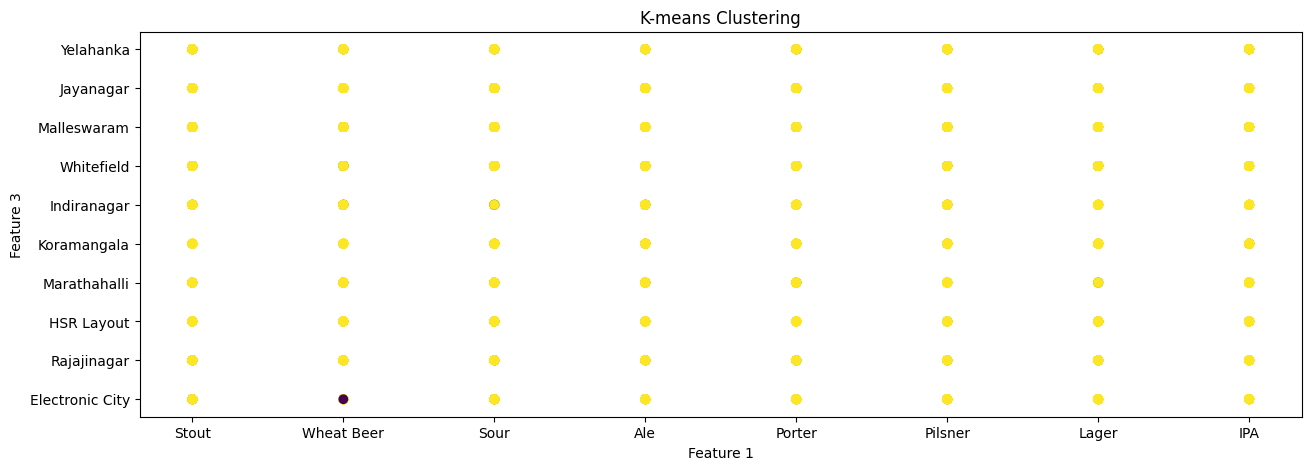

In [46]:
kmeans_model = KMeans(n_init = 10)
X_np = X.values
get_clusters13(kmeans_model, X_np)

In [47]:
def get_clusters23(model, X):
    pipeline = Pipeline([
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
        ("Scaler", StandardScaler(with_mean=False)),
        ("Clusterer", model)
    ])
    
    # Fit the pipeline to the data and obtain cluster assignments
    pipeline.fit(X)
    clusters = pipeline.named_steps['Clusterer'].labels_
    
    # Visualize the clusters
    plt.figure(figsize = (15,5))
    plt.scatter(X[:, 1], X[:, 2], c=clusters, cmap='viridis')
    plt.xlabel('Feature 2')
    plt.ylabel('Feature 3')
    plt.title('K-means Clustering')
    plt.show()

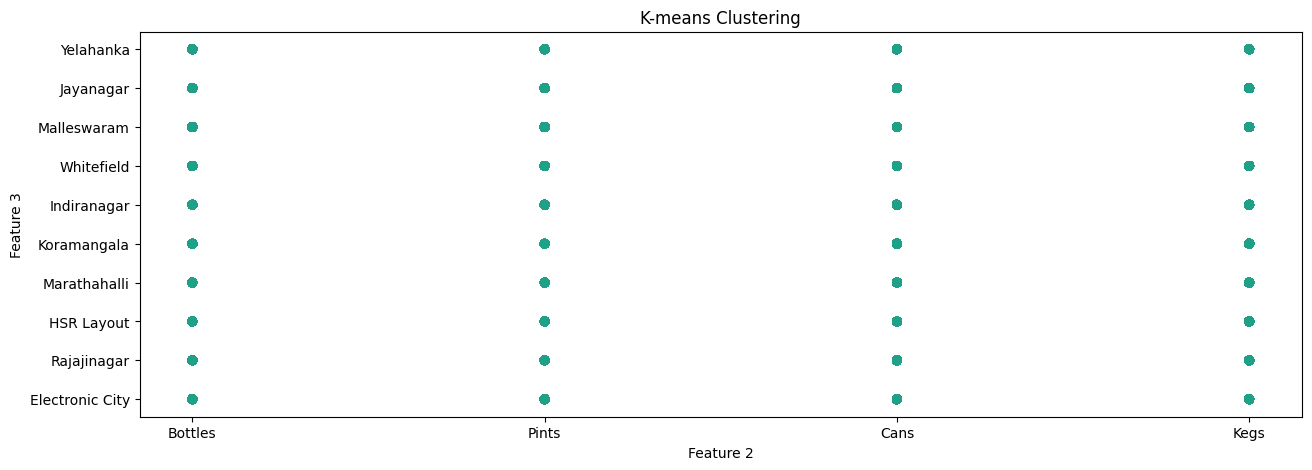

In [48]:
kmeans_model = KMeans(n_init = 10)
X_np = X.values
get_clusters23(kmeans_model, X_np)

**It looks like there a few different segments**